**This is the code to produce a sample set for and train a neural network.**
All python source code is in the neural.py file

In [1]:
%pylab inline
from Chempy.parameter import ModelParameters
a = ModelParameters()

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# First create the training dataset
from Chempy.neural import training_data
# %timeit -r 1 -n 1

The above was run on a faster machine, taking 2 hours, 26 minutes and 28 seconds to calculate a training dataset of length 15625. This is stored in the 'Neural/' folder


In [ ]:
# Now create the datasets for model verification (i.e. hyperparameter constraints)
# and for final testing

from Chempy.neural import verification_and_testing
# %timeit -r 1 -n 1

This was again run on a faster PC. The runtime was 19 minutes and 10 seconds, producing the verif_param_grid, verif_abundances, test_param_grid, test_abundances npy data files

In [ ]:
# Now create and train the neural network
from Chempy.neural import create_network
epoch, loss = create_network()

In [ ]:
plt.plot(epoch,loss)
plt.ylabel("L1 Loss value")
plt.xlabel("Epoch")
plt.title("Loss plot for learning rate = %s" %(a.learning_rate))

In [ ]:
predicted_abundances-verif_abundances[55]

In [ ]:
# Load verification dataset
verif_param = np.load('Neural/verif_param_grid.npy')
verif_abundances = np.load('Neural/verif_abundances.npy')

# Calculate average percentage error in sample per element
from Chempy.neural import neural_output
error = []

for i in range(a.verif_test_sizes[0]):
    predicted_abundances = neural_output(verif_param[i])
    # Compute percentage error for each element
    error.append(np.absolute(predicted_abundances-verif_abundances[i]))
element_error = np.mean(error,axis=0)
print(np.max(element_error))

In [7]:
verif_param = np.load('Neural/verif_param_grid.npy')
verif_abundances = np.load('Neural/verif_abundances.npy')
verif_abundances.shape

(10, 22)

In [ ]:
# Prepare plot
fig = plt.figure(figsize=(30.69,8.27), dpi=100)
plt.clf()
text_size = 15
plt.rc('font', family='serif',size = text_size)
plt.rc('xtick', labelsize=text_size)
plt.rc('ytick', labelsize=text_size)
plt.rc('axes', labelsize=text_size, lw=1.)
plt.rc('lines', linewidth = 1.)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,'font.size' : 16,'font.family' : 'libertine','text.latex.unicode': True}
ax = fig.add_subplot(111)
abundance_names = []
proto_sun = np.load('Chempy/input/stars/Proto-sun.npy')
for item in proto_sun.dtype.names[:-1]:
    if item != 'Fe':
        abundance_names.append('[%s/Fe]' %(item))
    else:
        abundance_names.append('[Fe/H]')
plt.xticks(np.arange(len(a.element_names)),abundance_names)

plt.plot(predicted_abundances,'r',label='Neural')
plt.plot(verif_abundances[-1],'g',label='Chempy')
plt.legend()
plt.ylabel("Abundances relative to solar in dex")
plt.xlabel("Element")
plt.title("Abundance plot")
savefig('Neural/test')

## Create corner plot for data

In [3]:
# Load verification dataset
verif_param = np.load('Neural/verif_param_grid.npy')
verif_abundances = np.load('Neural/verif_abundances.npy')

# Calculate average percentage error in sample per element
from Chempy.neural import neural_output
error = []

for i in range(a.verif_test_sizes[0]):
    predicted_abundances = neural_output(verif_param[i])
    # Compute percentage error for each element
    error.append(np.absolute(predicted_abundances-verif_abundances[i]))

# This contains absolute mean error for each parameter set
param_error = np.median(error,axis=1)

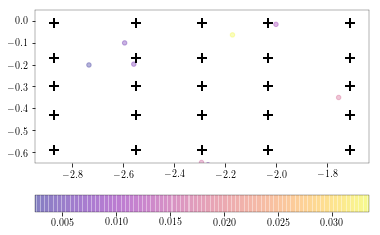

In [4]:
plt.clf()
plt.rc('axes', labelsize=16, lw=0.3)
plt.rc('text',usetex=True)

# Create plot

data_tr = np.load('Neural/training_param_grid.npy')
data_v = np.load('Neural/verif_param_grid.npy')
error = param_error

# Use only 2 axes now
x_tr = [item[0] for item in data_tr]
y_tr = [item[3] for item in data_tr]
x_v = [item[0] for item in data_v]
y_v = [item[3] for item in data_v]

fig = plt.figure()
ax = fig.add_subplot(111)
P1 = ax.scatter(x_tr,y_tr,c='k',marker='+',s=120)
ax = plt.gca()
# Store axis limits
xlim = ax.get_xlim()
ylim = ax.get_ylim()
P2 = ax.scatter(x_v,y_v,marker='.',alpha=0.3,
           c=error,s=80,cmap='plasma')
# Replot this on top
P1 = ax.scatter(x_tr,y_tr,c='k',marker='+',alpha=1,s=120)

ax.set_xlim(xlim)
ax.set_ylim(ylim)
fig.colorbar(P2,orientation='horizontal')
plt.show()

In [ ]:
# Create corner plot infrastructure
a=ModelParameters()

# Load verification dataset
data_v = np.load('Neural/verif_param_grid.npy')
data_v=np.hstack(np.asmatrix(data_v).T).reshape((len(a.p0),len(data_v)))

import corner

parameter_names = ['alpha','logN','logtau','logSFE','logSFR','xout']

# Set up plot
plt.clf()
fig,axes = plt.subplots(nrows = len(a.p0), ncols = len(a.p0),figsize=(14.69,8.0),dpi=300)
alpha = 0.5
lw=2 # Linewidth
left = 0.1 # Left side of subplots
right = 0.925 # Right side
bottom = 0.075
top = 0.97
wspace = 0.0 # blankspace width between subplots
hspace = 0.0 # blankspace height between subplots
plt.subplots_adjust(left=left,bottom=bottom,right=right,top=top,wspace=wspace,hspace=hspace)

for i in range(len(a.p0)):
    for j in range(len(a.p0)):
        axes[i,j].locator_params(nbins=4)
        if j==1:
            axes[i,j].locator_params(nbins=4)
        if i==j:
            counts,edges = np.histogram(np.asarray(data_v[j]),bins=10)
            max_count = float(np.max(counts))
            counts = np.divide(counts,max_count)
            axes[i,j].bar(left = edges[:-1], height=counts, width = edges[1]-edges[0], color='grey', alpha=alpha, linewidth=0, edgecolor='blue')
            if j !=0:
                plt.setp(axes[i,j].get_yticklabels(), visible=False)
            
            axes[i,j].vlines(np.percentile(data_v[j],15.865),axes[i,j].get_ylim()[0],axes[i,j].get_ylim()[1], color = 'k',alpha=alpha,linewidth = lw,linestyle = 'dashed')    
            axes[i,j].vlines(np.percentile(data_v[j],100-15.865),axes[i,j].get_ylim()[0],axes[i,j].get_ylim()[1], color = 'k',alpha=alpha,linewidth = lw,linestyle = 'dashed')    
            axes[i,j].vlines(np.percentile(data_v[j],50),axes[i,j].get_ylim()[0],axes[i,j].get_ylim()[1], color = 'k',alpha=alpha,linewidth = lw)
        if i>j:
            if j !=0:
                plt.setp(axes[i,j].get_yticklabels(), visible=False)
            corner.hist2d(np.asarray(data_v[j]),np.asarray(data_v[i]), ax = axes[i,j], bins=15, levels=(1-np.exp(-0.5),1-np.exp(-2.0),1-np.exp(-4.5)))
        if j>i:
            axes[i,j].axis('off')
        if i == len(a.p0)-1:
            axes[i,j].set_xlabel(parameter_names[j])
        if j ==0:
            axes[i,j].set_ylabel(parameter_names[i])
            
fig.savefig('Neural/corner_parameter_plot.png',dpi=300,bbox_inches='tight')

**NOTES**
- Change the diagonal to be correct histogram of data
- Color histogram by mean error in that bar
- Add other params
- Add correlation coeffs?
- Optimize axis sizes (see plot_mcmc.py)
- Add meshgrid for colors?

In [ ]:
data_tr = np.load('Neural/training_param_grid.npy')
data_v = np.load('Neural/verif_param_grid.npy')
error = param_error


In [ ]:
test = np.asmatrix(data_v)
